In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [66]:
data = pd.read_csv("vgsales.csv")

In [67]:
data.shape

(16598, 11)

In [68]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [69]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [70]:
# Remove all games after 2016 and remove data with $0 in Global Sales
data = data[data.Year < 2017.]
data = data[data.Global_Sales > 0.]

In [71]:
data.shape

(16323, 11)

In [72]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [73]:
null_data = data[data.Publisher.isnull()]

In [74]:
null_data.head(36)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42
5647,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.00,0.01,0.32
6437,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.19,0.07,0.00,0.00,0.27
6562,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004.0,Misc,NaN,0.18,0.07,0.00,0.00,0.26


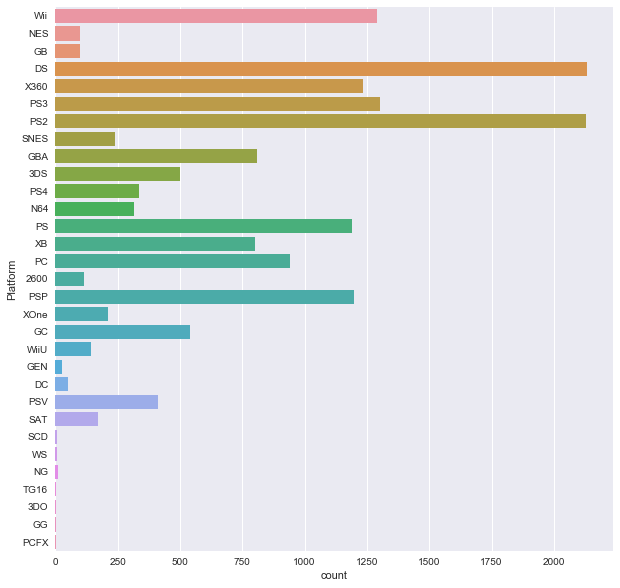

In [75]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.countplot(y = "Platform", data = data)

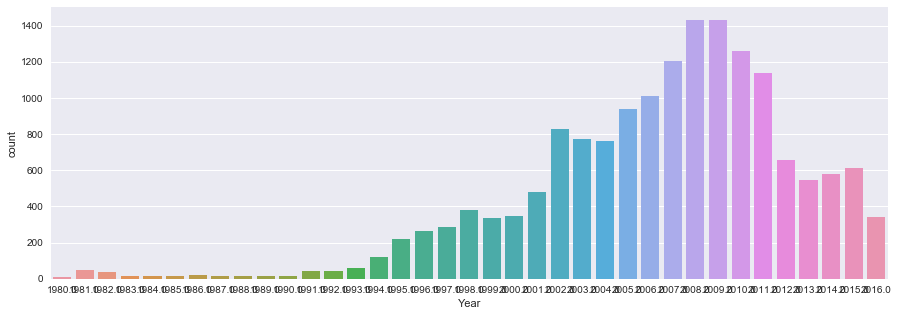

In [76]:
sns.set(rc={"figure.figsize": (15, 5)})
sns.countplot(x = "Year", data = data)
# Videogame made in 2020

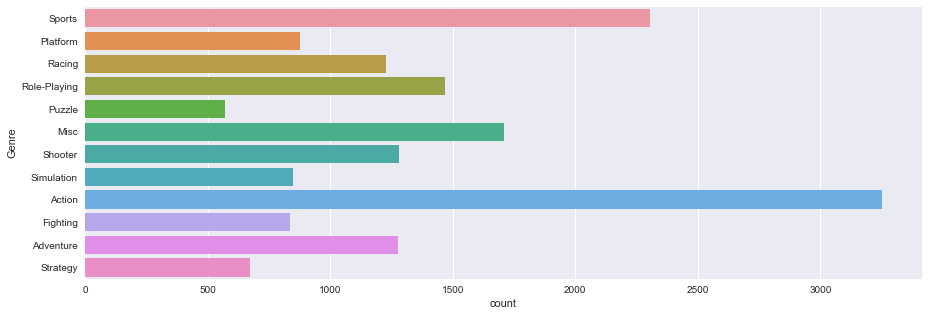

In [77]:
sns.countplot(y = "Genre", data = data)

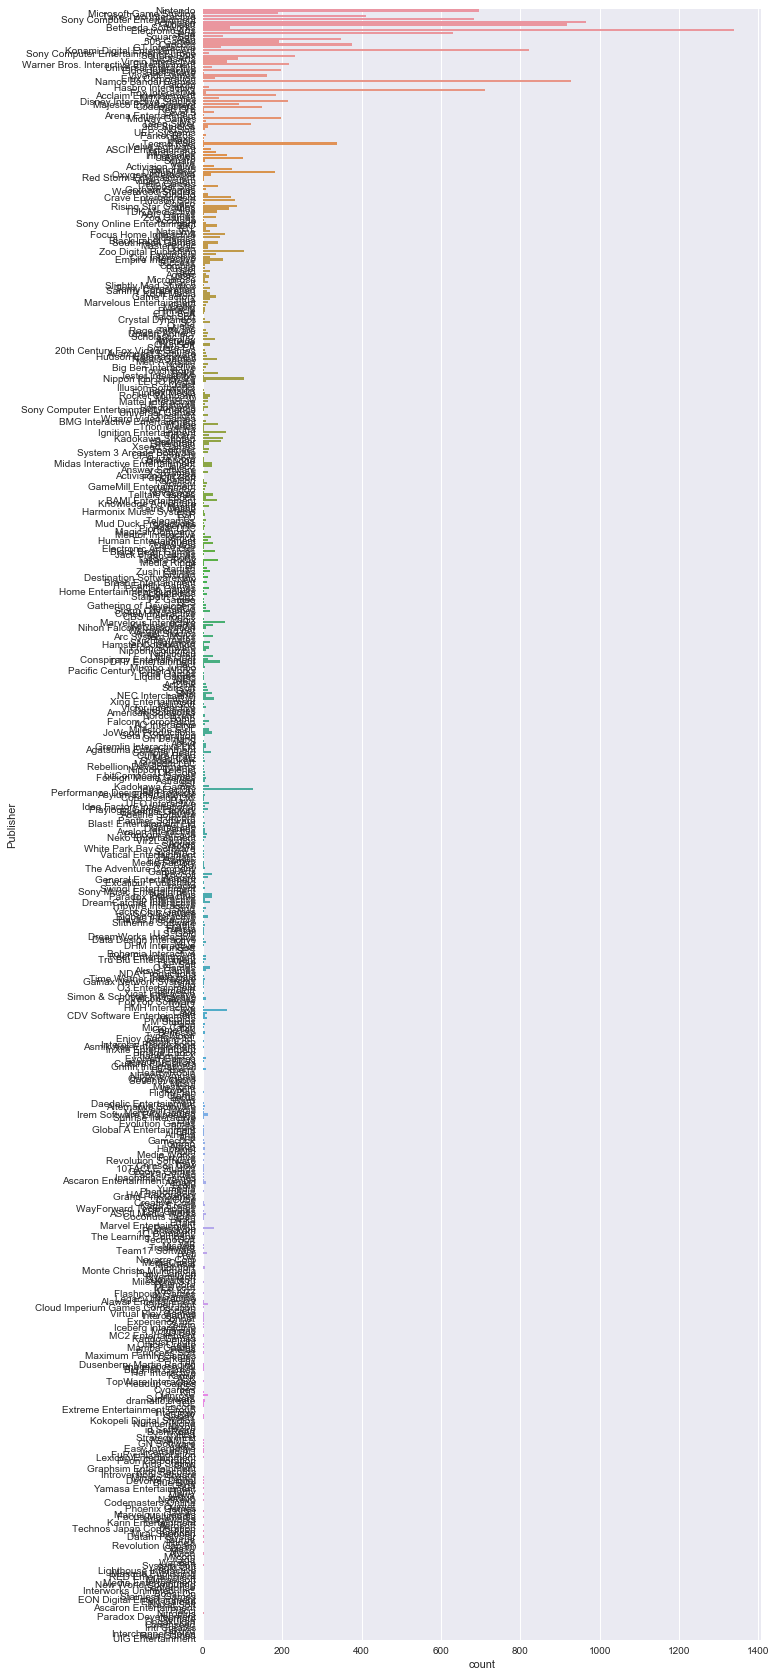

In [78]:
sns.set(rc={"figure.figsize": (10, 30)})
sns.countplot(y = "Publisher", data = data)

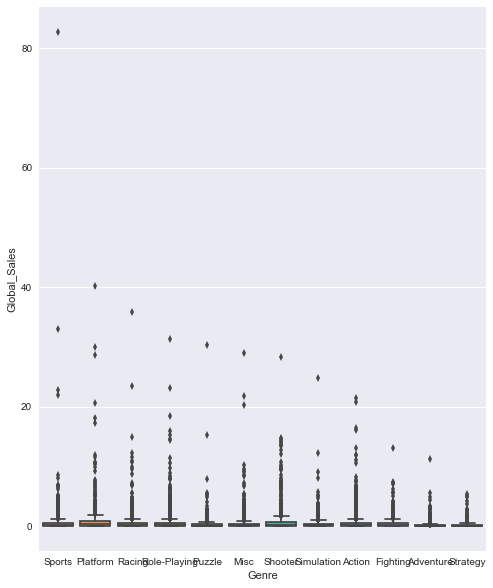

In [81]:
sns.set(rc={"figure.figsize": (8, 10)})
sns.distplot(np.sqrt(data.NA_Sales[data.NA_Sales > 0.]))

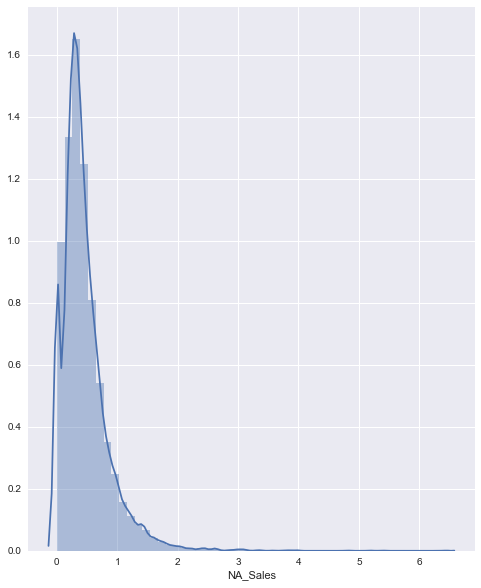

In [82]:
sns.distplot(np.sqrt(data.NA_Sales[data.EU_Sales > 0.]))

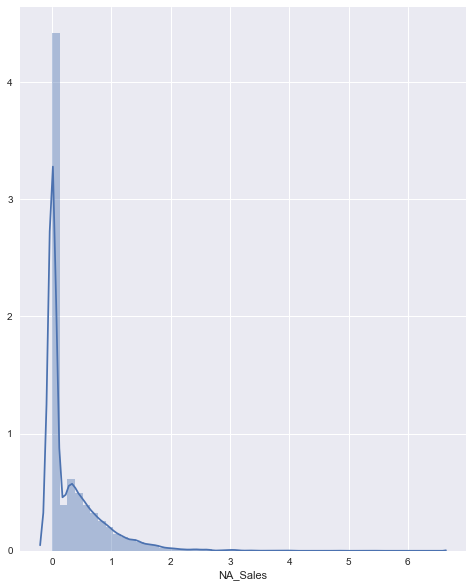

In [84]:
sns.distplot(np.sqrt(data.NA_Sales[data.JP_Sales > 0.]))

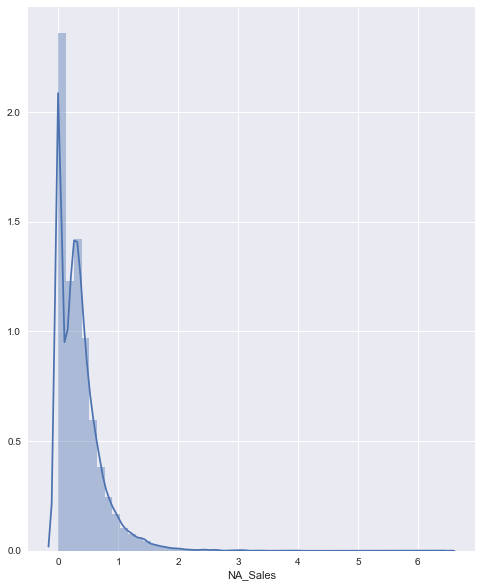

In [85]:
sns.distplot(np.sqrt(data.NA_Sales[data.Global_Sales > 0.]))